In [174]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [175]:
def rotation_matrix(theta):
    theta = np.deg2rad(theta)
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)

    rotation = np.array([[cos_theta, -sin_theta, 0],
                         [sin_theta, cos_theta, 0],
                         [0, 0, 1]])

    return rotation

5.656854249492381 7.071067811865475
51.340191745909905


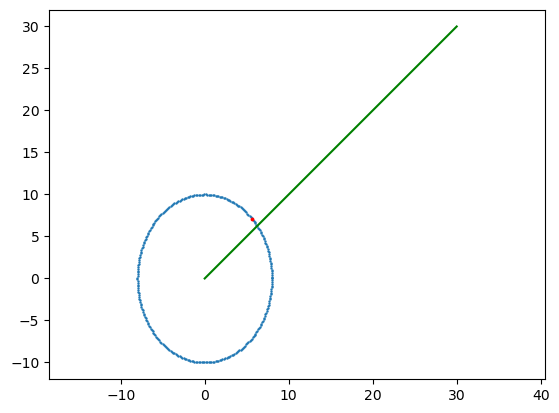

In [289]:
a = 8
b = 10
theta = 45
theta_rad = math.radians(theta)

x_n = a * math.cos(theta_rad)
y_n = b * math.sin(theta_rad)

thetas = np.linspace(0, 2 * np.pi, 300)
x = a * np.cos(thetas)
y = b * np.sin(thetas)

p_x, p_y = 30, 30
plt.axis('equal')
plt.scatter(x, y, s=0.5)
plt.scatter(x_n, y_n, s=3, color='red')
plt.plot([0, p_x], [0, p_y], color='green')
print(x_n, y_n)
print(np.rad2deg(np.arctan(y_n / x_n)))


In [177]:
body = np.array([x, y, np.ones(len(x))])

3.3301270189221936 3.4999999999999996


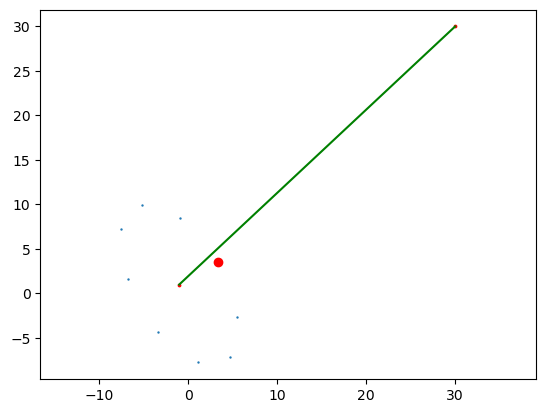

In [290]:
x_r, y_r, yaw = -1.0, 1.0, 30

rot_body = np.dot(body.T, rotation_matrix(-yaw))

x_rot = rot_body[:, 0] + x_r
y_rot = rot_body[:, 1] + y_r

x_ob, y_ob = 30, 30

distances = np.sqrt((x_rot - x_ob)**2 + (y_rot - x_ob)**2)
closest_index = np.argmin(distances)
closest_x, closest_y = x_rot[closest_index], y_rot[closest_index]

plt.axis('equal')
plt.scatter(x_rot, y_rot, s = 0.5)
plt.scatter(x_ob, y_ob,s = 3, color='red')
plt.scatter(x_r, y_r,s = 3, color='red')
plt.scatter(closest_x, closest_y, color='red', label='Closest Point')
plt.plot([x_r, x_ob], [y_r, y_ob], color='green')
print(closest_x, closest_y);


In [192]:
def rotation_matrix(theta):
    theta = np.deg2rad(theta)
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)

    rotation = np.array([[cos_theta, -sin_theta, 0],
                         [sin_theta, cos_theta, 0],
                         [0, 0, 1]])

    return rotation

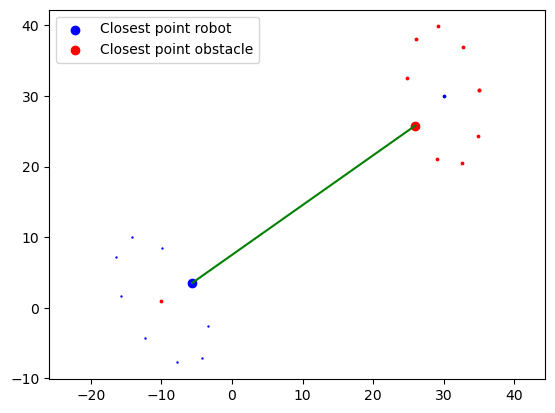

The closest point to the obstacle is (-5.669872981077806, 3.4999999999999996).
Min distance: 38.71536366045606
CPU times: user 456 ms, sys: 184 ms, total: 640 ms
Wall time: 389 ms


In [317]:
%%time
a = 5
b = 10

thetas = np.linspace(0, 2 * np.pi, 10)
x = a * np.cos(thetas)
y = b * np.sin(thetas)

body = np.array([x, y, np.ones(len(x))])

x_r, y_r, yaw = -10.0, 1.0, 30

rot_body = np.dot(body.T, rotation_matrix(-yaw))

x_rot = rot_body[:, 0] + x_r
y_rot = rot_body[:, 1] + y_r

# Define the parameters of the ellipse obstacle
x_ob_offset = 30
y_ob_offset = 30
yaw_obs = 10

a_ob = 8
b_ob = 4
x_ob = a_ob * np.cos(thetas)
y_ob = b_ob * np.sin(thetas)

body_obs = np.array([x, y, np.ones(len(x))])

rot_obs = np.dot(body_obs.T, rotation_matrix(-yaw_obs))

x_ob = rot_obs[:, 0] + x_ob_offset
y_ob = rot_obs[:, 1] + y_ob_offset

min_distance = np.inf

for x, y in zip(x_ob, y_ob):
    distances = np.sqrt((x_rot - x)**2 + (y_rot - y)**2)
    if np.min(distances) < min_distance:
        x_ob_min = x
        y_ob_min = y
        min_distance = np.min(distances)
        closest_index = np.argmin(distances)
        closest_x, closest_y = x_rot[closest_index], y_rot[closest_index]

plt.axis('equal')
plt.scatter(x_rot, y_rot, s=0.5, color='blue')
plt.scatter(x_ob, y_ob, s=3, color='red')
plt.scatter(x_ob_offset, y_ob_offset, s=3, color='blue')
plt.scatter(x_r, y_r, s=3, color='red')
plt.scatter(closest_x, closest_y, color='blue', label='Closest point robot')
plt.scatter(x_ob_min, y_ob_min, color='red', label='Closest point obstacle')
plt.plot([closest_x, x_ob_min], [closest_y, y_ob_min], color='green')
plt.legend()
plt.show()

print(f"The closest point to the obstacle is ({closest_x}, {closest_y}).")
print(f"Min distance: {min_distance}")


In [328]:
def min_distance(robot_pose, obstacle_pose):
    x_robot, y_robot, yaw_robot, height_robot, width_robot = robot_pose
    x_obstacle, y_obstacle, yaw_obstacle, height_obstacle, width_obstacle = obstacle_pose

    thetas = np.linspace(0, 2 * np.pi, 10)
    
    x = height_robot * np.cos(thetas)
    y = width_robot * np.sin(thetas)
    body = np.array([x, y, np.ones(len(x))])
    rot_body = np.dot(body.T, rotation_matrix(-yaw_robot))
    x_rot = rot_body[:, 0] + x_robot
    y_rot = rot_body[:, 1] + y_robot

    # Define the parameters of the ellipse obstacle
    x_ob = height_obstacle * np.cos(thetas)
    y_ob = width_obstacle * np.sin(thetas)
    body_obs = np.array([x_ob, y_ob, np.ones(len(x))])
    rot_obs = np.dot(body_obs.T, rotation_matrix(-yaw_obstacle))
    x_ob_rot = rot_obs[:, 0] + x_obstacle
    y_ob_rot = rot_obs[:, 1] + y_obstacle

    min_distance = np.inf

    for x, y in zip(x_ob_rot, y_ob_rot):
        distances = np.sqrt((x_rot - x)**2 + (y_rot - y)**2)
        if np.min(distances) < min_distance:
            min_distance = np.min(distances)
            x_ob_min = x
            y_ob_min = y
            closest_index = np.argmin(distances)
            closest_x, closest_y = x_rot[closest_index], y_rot[closest_index]
    
    x_diff = closest_x - x_ob_min
    y_diff = closest_y - y_ob_min

    plt.axis('equal')
    plt.scatter(x_rot, y_rot, s=0.5)
    plt.scatter(x_ob_rot, y_ob_rot, s=3, color='red')
    plt.scatter(x_r, y_r, s=3, color='red')
    plt.scatter(x_obstacle, y_obstacle, s=3, color='blue')
    plt.scatter(closest_x, closest_y, color='blue', label='Closest point robot')
    plt.scatter(x_ob_min, y_ob_min, color='red', label='Closest point obstacle')
    plt.plot([closest_x, x_ob_min], [closest_y, y_ob_min], color='green')
    plt.legend()
    plt.show()
    return x_diff, y_diff

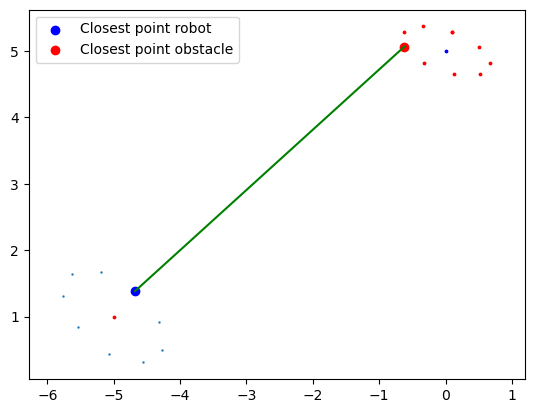

(-4.057644796713318, -3.6833625782308412)

In [334]:
# ROBOT
x_r = -5.0
y_r = 1.0
yaw = 50
height_robot = 0.5
width_robot  = 0.9

# OBSTACLE
x_obs = 0.0
y_obs = 5.0
yaw_obs = 70
height_obs = 0.3
width_obs  = 0.7

robot_pose = [x_r, y_r, yaw, height_robot, width_robot]
obstacle_pose = [x_obs, y_obs, yaw_obs, height_obs, width_obs]
min_distance(robot_pose, obstacle_pose)